In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
zoo=pd.read_csv('zoo.csv')
zoo.shape

(101, 18)

In [6]:
testCarogna = pd.DataFrame(columns=zoo.columns,dtype=int)
rowRemove = []
for i in range(1,8):
    for index,row in zoo.iterrows():
        if (row[17]==i and row[13]!=5 and row[0]!='frog'):
            testCarogna.loc[i]= row
            rowRemove.append(index)
            i=i+1
            break

zoo.drop(rowRemove, inplace=True)
testCarogna

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
1,pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
2,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
3,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
5,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
6,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
7,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7


In [7]:
cols = zoo.columns.tolist
cols

<bound method IndexOpsMixin.tolist of Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')>

In [8]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 6 to 10
Data columns (total 18 columns):
animal_name    94 non-null object
hair           94 non-null int64
feathers       94 non-null int64
eggs           94 non-null int64
milk           94 non-null int64
airborne       94 non-null int64
aquatic        94 non-null int64
predator       94 non-null int64
toothed        94 non-null int64
backbone       94 non-null int64
breathes       94 non-null int64
venomous       94 non-null int64
fins           94 non-null int64
legs           94 non-null int64
tail           94 non-null int64
domestic       94 non-null int64
catsize        94 non-null int64
class_type     94 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.0+ KB


In [9]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000,94.000000,94.000000
mean,0.446809,0.202128,0.563830,0.425532,0.234043,0.351064,0.542553,0.606383,0.829787,0.797872,0.085106,0.170213,2.776596,0.744681,0.12766,0.457447,2.744681
std,0.499828,0.403740,0.498568,0.497074,0.425669,0.479862,0.500857,0.491171,0.377835,0.403740,0.280536,0.377835,2.022211,0.438378,0.33550,0.500857,2.083918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.250000,0.00000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.00000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.00000,1.000000,7.000000


1    40
2    19
4    12
7     9
6     7
3     4
5     3
Name: class_type, dtype: int64

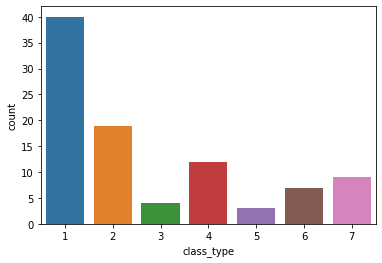

In [10]:
#plot class-type

sns.countplot(zoo['class_type'])
pd.Series.value_counts(zoo['class_type'])

In [19]:
from sklearn import neighbors

cols_X =['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']
cols_Y = ['class_type']

sco = []
scobru = []
sco_ = 0
bestk=0
for j in range(1,10):
    neigh = sk.neighbors.KNeighborsClassifier(n_neighbors=j)
    for i in range(10):
        
        zoo_nn = sk.utils.shuffle(zoo)
        zoo_nn = zoo_nn.reset_index()
        zoo_nn = zoo_nn.drop('index',axis=1)
        
        #split 
        X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        zoo_nn[cols_X], zoo_nn[cols_Y], test_size=0.3, random_state=10)
        #knn
        neigh.fit(X_train, y_train.values.ravel())
        predict = neigh.predict(X_test)
        sco.append(neigh.score(X_test,y_test))
        #val_sco = cross_val_score(neigh, X = df_nn[cols_X], y = df_nn[cols_Y])
        #sco.append(np.mean(val_sco))
    if(np.mean(sco)>sco_):
        bestk = j
        sco_ = np.mean(sco)
    #print("ksco: "+str(np.mean(sco)))
    sco.clear
    print("best k: "+str(bestk))
neigh = sk.neighbors.KNeighborsClassifier(n_neighbors=bestk)

sco = []
for i in range(100):
    
    zoo_nn = sk.utils.shuffle(zoo)
    #df_nn = df_nn.reset_index()
    #df_nn = df_nn.drop('index',axis=1)
    
    #split 
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    zoo_nn[cols_X], zoo_nn[cols_Y], test_size=0.3, random_state=2*i)
    #knn
    neigh.fit(X_train, y_train.values.ravel()) 

    predict = neigh.predict(X_test)
    sco.append(neigh.score(X_test,y_test))
    if(neigh.score(X_test,y_test)<0.9):
        y_test_err = y_test
    ##predict = neigh.predict(testCarogna[cols_X])
    ##scobru.append(neigh.score(testCarogna[cols_X],testCarogna[cols_Y]))
print("score x_test: "+str(np.mean(sco)))

best k: 1
best k: 1
best k: 1
best k: 1
best k: 1
best k: 1
best k: 1
best k: 1
best k: 1
score x_test: 0.9548275862068963


In [24]:
#plot co-relation

def plot_correlation_map( zoo ):
    corr = zoo.corr()
    _ , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8 }
    )

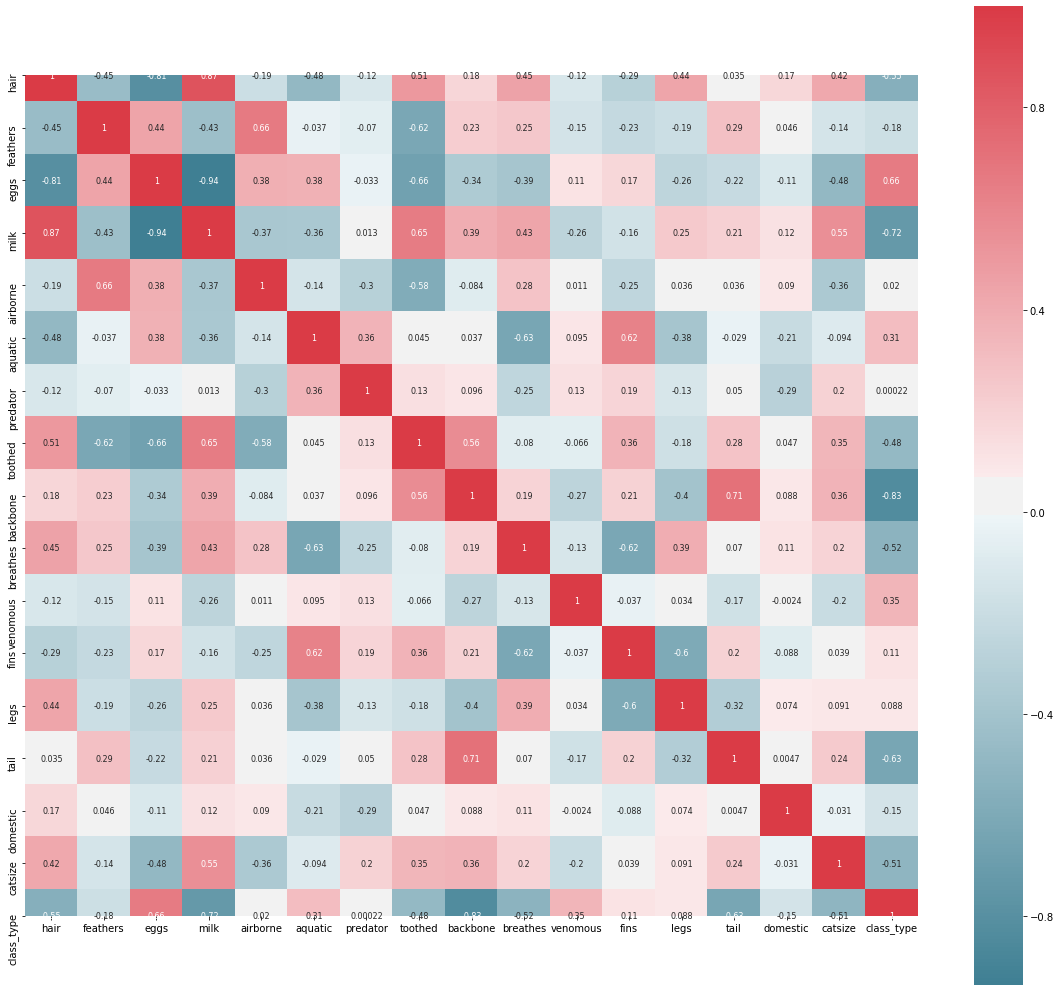

In [25]:
plot_correlation_map(zoo)

Confusion matrix, without normalization
[[5 3 0 1 1 1 1]
 [4 2 0 0 0 1 2]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [3 0 0 0 0 1 1]]


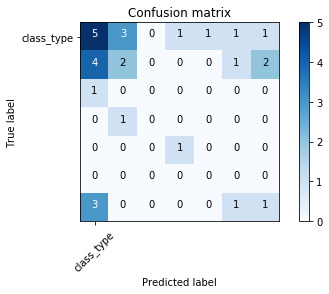

In [26]:
#plot confussion-matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # CONFUSION MATRIX  - use test_err
    #from pandas_ml import ConfusionMatrix
    #from pandas_confusion import ConfusionMatrix
from sklearn.metrics import confusion_matrix
p= pd.DataFrame(predict,dtype=int, index=y_test_err.index)
p.columns = ['pred']
confusion_matrix = confusion_matrix(y_test_err['class_type'], p['pred'])
#print("Confusion matrix:\n%s" % confusion_matrix)
plot_confusion_matrix(confusion_matrix, classes=cols_Y)